In [2]:
pip install -q missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
contd= ['age','blood pressure','Blood Glucose Random','Blood Urea','Serum Creatinine','Sodium','Potassium','Hemoglobin','Packed  Cell Volume','White Blood Cell Count','Red Blood Cell Count']
cat= ['albumin','specific gravity','Sugar','Red Blood Cells(nominal)','Pus Cell','Pus Cell clumps','Bacteria','Hypertension','Diabetes Mellitus','Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Class ']


# Load Excel file into DataFrame
df = pd.read_csv('/Users/lawshia/Desktop/SDM Final Project/kidney.csv')
df.replace('?', np.nan, inplace=True)
 
for col in contd:
    try:
        df[col]=df[col].astype(int)
    except:
        df[col]=df[col].astype(float)

df['Pus Cell'].replace('nan', np.nan)
# df.set_index('age')
df.head()

,age,blood pressure,specific gravity,albumin,Sugar,Red Blood Cells(nominal),Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,80.0,1.02,1,0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h4 id="section1" style="font-family: 'Times New Roman', Times, serif;">Check for Missing At Random (MAR)</h4>
  </head>
</html>
    </div>

<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h id="section1" style="font-family: 'Times New Roman', Times, serif;">1. Comparison of Descriptive statistics</h4>
  </head>
</html>
    </div>

In [5]:
import pandas as pd
from IPython.display import HTML

columns=['age','blood pressure','specific gravity','albumin','Sugar','Blood Glucose Random','Blood Urea','Serum Creatinine','Hemoglobin','Packed  Cell Volume']


for col in columns:
    try:
        df[col]=df[col].astype(int)
    except:
        df[col]=df[col].astype(float)
tables = []
columns_list = df.columns
df_without_nan=df.copy(deep=True)
df_without_nan = df_without_nan.dropna()
df_without_nan.shape




for col in columns_list:
    df_stats = df[col].describe()
    
    # compute the statistics for the dataframe without missing values
    df_stats_no_nan = df_without_nan[col].describe()
    
    # combine the statistics into a single dataframe
    df_combined = pd.concat([df_stats, df_stats_no_nan], axis=1)
    
    # set the column names
    df_combined.columns = ['With NaN', 'Without NaN']
    
    # convert the dataframe to an HTML table and add it to the list
    tables.append(df_combined.to_html())
# Concatenate dataframes vertically
concatenated_df = pd.concat([df[col].describe() for col in columns], axis=1)
concatenated_df.columns = columns

concatenated_df_withoutnan = pd.concat([df_without_nan[col].describe() for col in columns], axis=1)
concatenated_df_withoutnan.columns = columns


# Export the concatenated dataframe to an Excel file
concatenated_df.to_excel('combined_tables.xlsx', index=False)

with pd.ExcelWriter('/Users/lawshia/Desktop/SDM Final Project/combined_tables.xlsx',engine='openpyxl', mode='a') as writer:
    # write the dataframe to the specified sheet
    concatenated_df.to_excel(writer, sheet_name='with_nan', index=False)
    concatenated_df_withoutnan.to_excel(writer, sheet_name='without_nan', index=False)


# with pd.ExcelWriter('/Users/lawshia/Desktop/SDM Final Project/combined_tables.xlsx',engine='openpyxl', mode='a') as writer:
#     # write the dataframe to the specified sheet
#     concatenated_df_withoutnan.to_excel(writer, sheet_name='without_nan', index=False)

# concatenate the HTML tables and display them
HTML(''.join(tables))


,With NaN,Without NaN
count,391.000000,158.000000
mean,51.483376,49.563291
std,17.169714,15.512244
min,2.000000,6.000000
25%,42.000000,39.250000
50%,55.000000,50.500000
75%,64.500000,60.000000
max,90.000000,83.000000
,With NaN,Without NaN
count,388.000000,158.000000


In [6]:
# import numpy as np
# from scipy.stats import ttest_ind

# # create two random samples with different means
# columns=['age','blood pressure','specific gravity','albumin','Sugar','Blood Glucose Random','Blood Urea','Serum Creatinine','Hemoglobin','Packed  Cell Volume']

# for col in columns:
#     sample1=df[col].dropna()
#     sample2 = df.dropna()[col]


#     # perform Welch's t-test
#     t, p = ttest_ind(sample1, sample2, equal_var=False)

#     # print t-test results
#     print(col)
#     print(f"t-value: {t:.4f}")
#     print(f"p-value: {p:.4f}")
    
    

<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h id="section1" style="font-family: 'Times New Roman', Times, serif;">2. Correlation between missing values vs  features</h4>
  </head>
</html>
    </div>

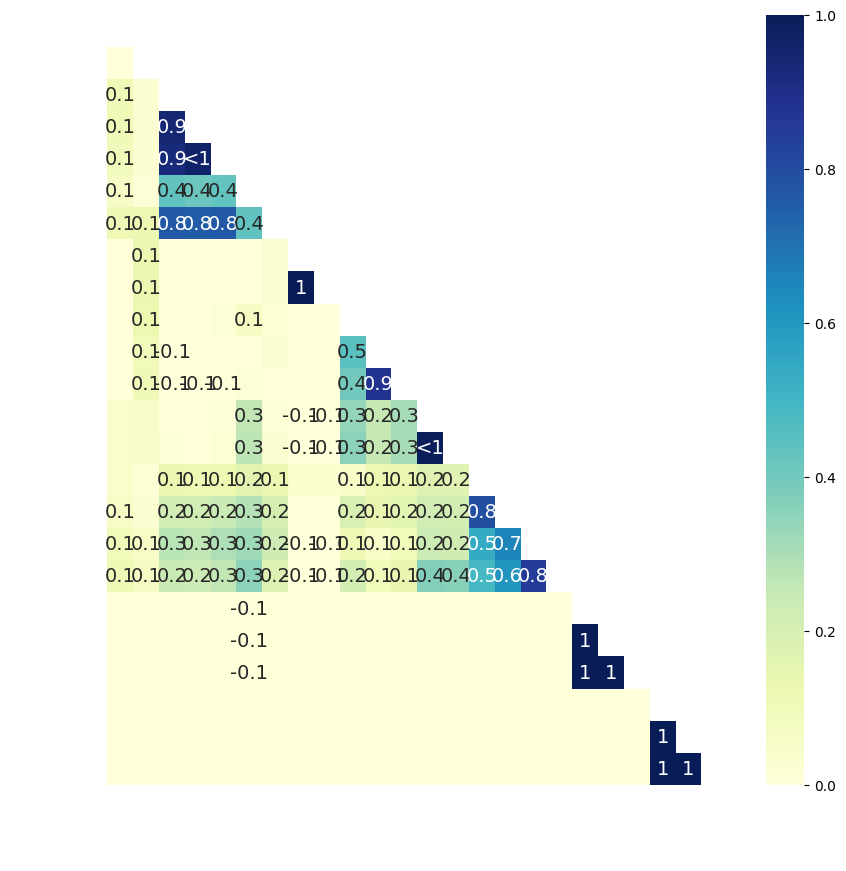

In [7]:
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set the color palette
cmap = 'YlGnBu'

fig, ax = plt.subplots(figsize=(10,10))
msno.heatmap(df, ax=ax, cmap=cmap, vmin=0, vmax=1, cbar=True)

# set title and axis labels
# ax.set_title('Missing values heatmap', fontsize=20)
# set font size and background color of x and y axis tick labels
ax.tick_params(axis='x', labelsize=5, labelcolor='white', labelrotation=45)
ax.tick_params(axis='y', labelsize=5, labelcolor='white')
# set background color of x and y axis labels
# set font size of x and y axis tick labels


ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_fontsize(2)
ax.yaxis.label.set_fontsize(2)

# ax.set_facecolor('#102B30')
# set background color of figure
# fig.patch.set_facecolor('#102B30')
# save the figure to file
fig.savefig('missing_values_heatmap.png')

<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h id="section1" style="font-family: 'Times New Roman', Times, serif;">3. Chi-square test</h4>
  </head>
</html>
    </div>

In [9]:
%matplotlib inline

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

%matplotlib inline

# perform chi-squared tests for each pair of columns
results = {}
for i,col_of_interest in enumerate(df.columns):
    for col in df.columns:
        if col != col_of_interest:
            observed = pd.crosstab(df[col_of_interest].isna(), df[col].isna())
            chi2, p, dof, expected = chi2_contingency(observed)
            if col_of_interest not in results:
                results[col_of_interest] = {}
            results[col_of_interest][col] = {'chi2': chi2, 'p-value': p}
# results
# # create a heatmap of the p-values
# p_values = pd.DataFrame.from_dict({(i,j): results[i][j]['p-value'] for i in results.keys() for j in results[i].keys()}, orient='index')
# p_values
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.heatmap(p_values, annot=True, fmt=".3f", cmap='YlGnBu', ax=ax)
# ax.set_title("Consolidated P-values", fontsize=16)
# ax.set_xlabel("Column", fontsize=14)
# ax.set_ylabel("Column of Interest", fontsize=14)
# ax.tick_params(axis='both', labelsize=12)
# plt.show()


In [11]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
df_chi = pd.DataFrame(columns=df.columns)

# define the column of interest
for i,col_of_interest in enumerate(df.columns):
    # perform chi-squared tests for each pair of columns
    results = {}
    for col in df.columns:
        if col != col_of_interest:
            observed = pd.crosstab(df[col_of_interest].isna(), df[col].isna())
            chi2, p, dof, expected = chi2_contingency(observed)
            results[col] = {'chi2': chi2, 'p-value': p}
            
        else:
            print(col)
            df_chi.loc[i,col] =1

    # print the results
#     print(f"Results for {col_of_interest}:")
    for col, values in results.items():
        df_chi.loc[i,col] = round(values['p-value'],2)
#         print(f"{col}: chi-square statistic = {values['chi2']:.2f}, p-value = {values['p-value']:.4f}")
        
df_chi = df_chi.set_index(df.columns)
df_chi = df_chi.astype(float)
# df_chi

age
blood pressure
specific gravity
albumin
Sugar
Red Blood Cells(nominal)
Pus Cell
Pus Cell clumps
Bacteria
Blood Glucose Random
Blood Urea
Serum Creatinine
Sodium
Potassium
Hemoglobin
Packed  Cell Volume
White Blood Cell Count
Red Blood Cell Count
Hypertension
Diabetes Mellitus
Coronary Artery Disease
Appetite
Pedal Edema
Anemia
Class 


/var/folders/qf/0x17ggpj79qcsgvytcrhmgnw0000gn/T/ipykernel_5952/318780692.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_chi, dtype=np.bool)


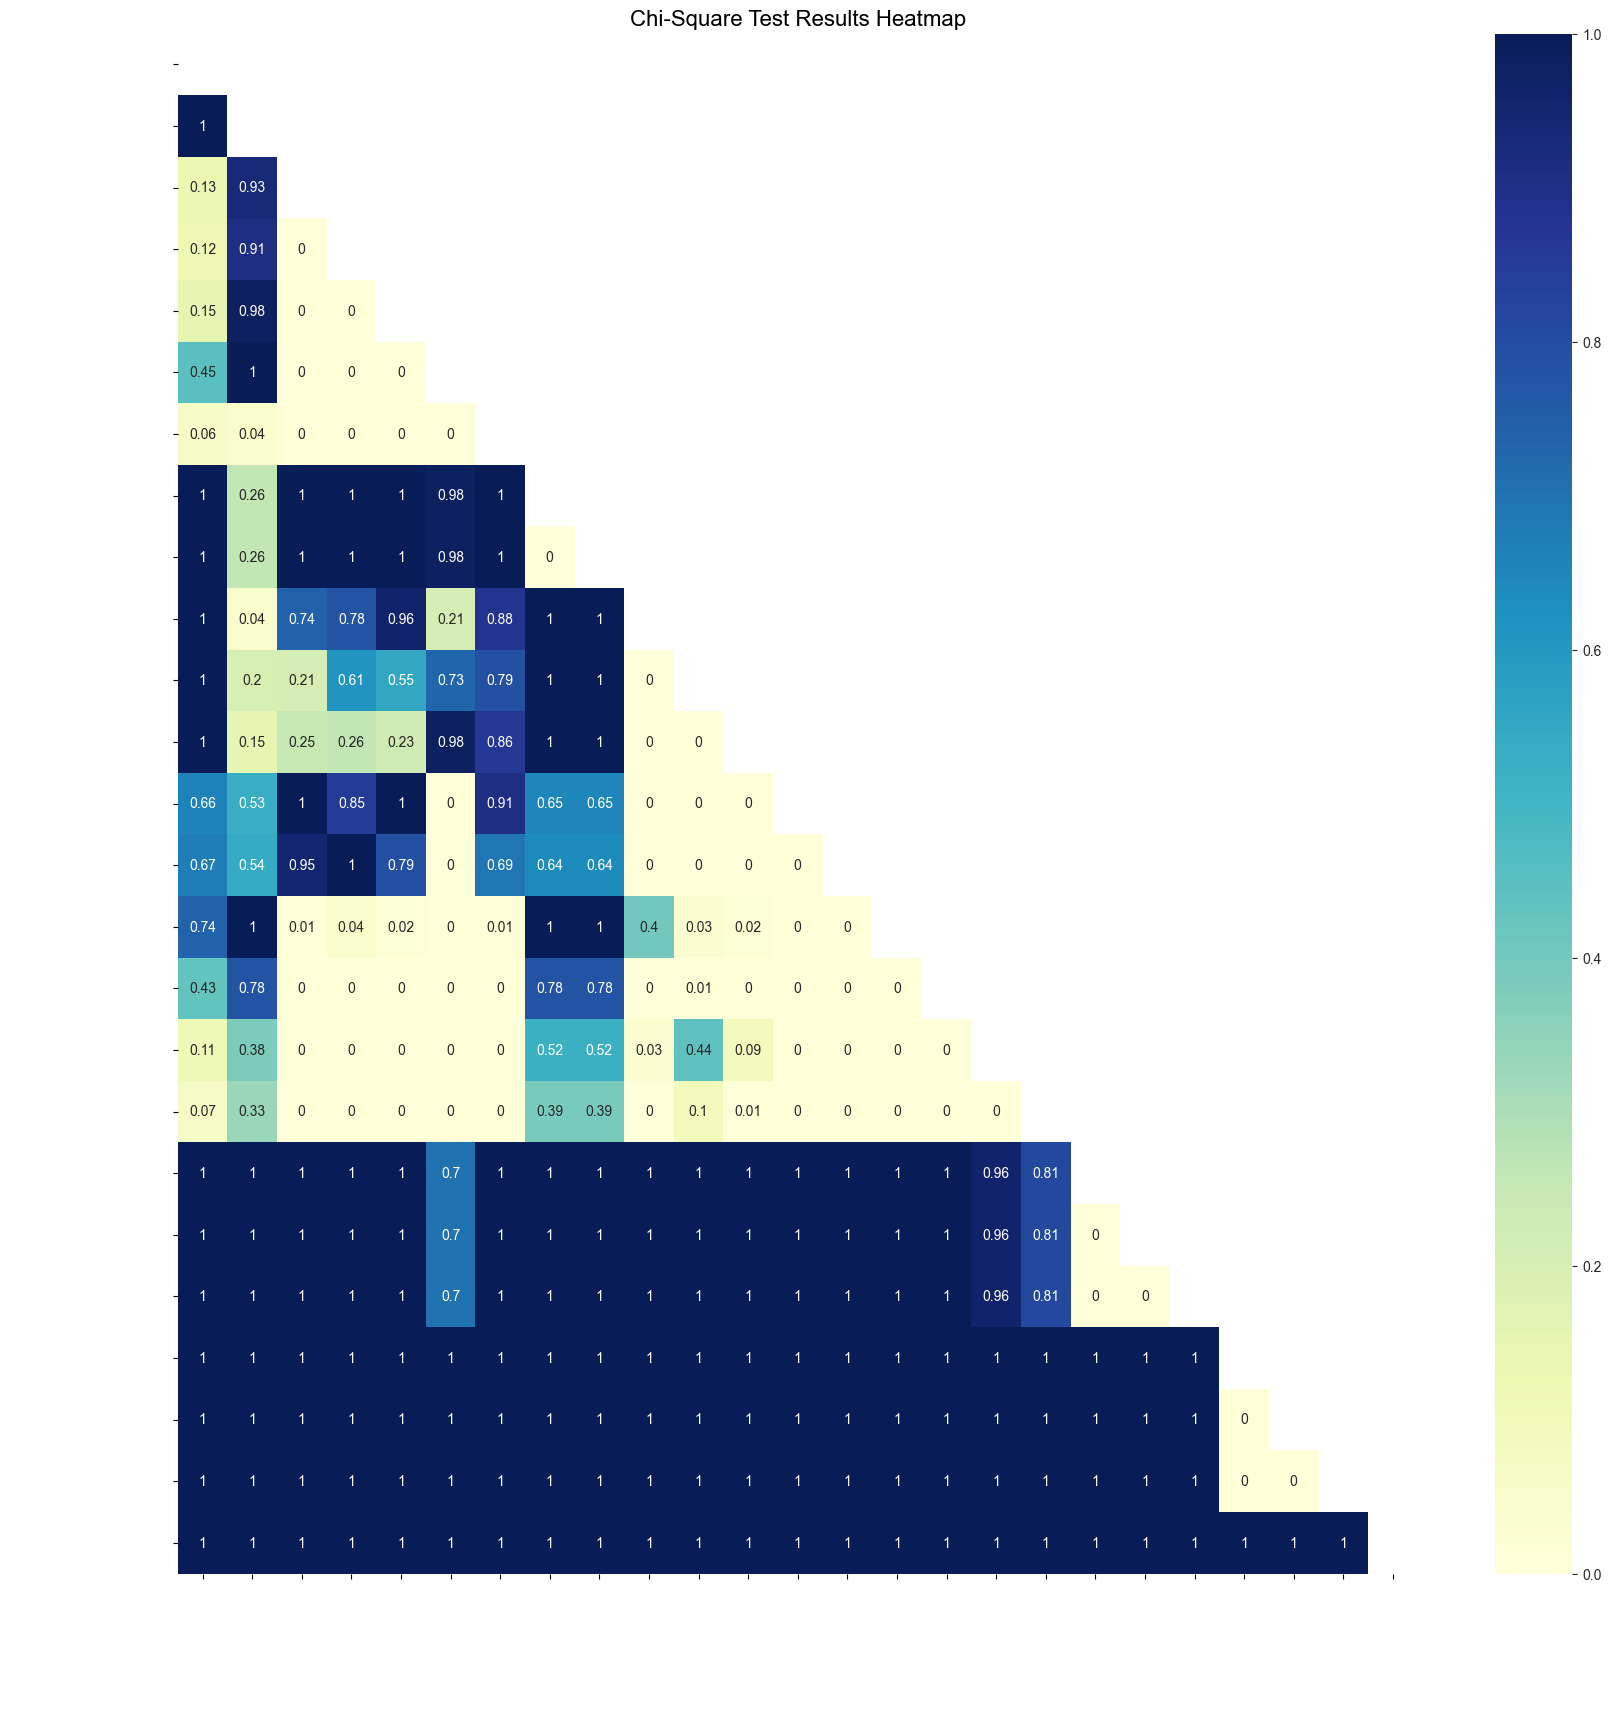

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# create a mask for upper triangle
mask = np.zeros_like(df_chi, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# create heatmap with lower triangle mask
fig, ax = plt.subplots(figsize=(20, 20))
sns.set_style("whitegrid", {'axes.grid' : False})
# msno.heatmap(df, ax=ax, cmap=cmap, vmin=0, vmax=1, cbar=True)
sns.heatmap(df_chi, annot=True, cmap='YlGnBu', ax=ax, mask=mask)
# ax.set_facecolor('#102B30')
# set axis labels and title
ax.set_title('Chi-Square Test Results Heatmap', fontsize=16)

# set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=12)


# set font size and background color of x and y axis tick labels
ax.tick_params(axis='x', labelsize=10, labelcolor='white', labelrotation=45)
ax.tick_params(axis='y', labelsize=10, labelcolor='white')
# set background color of x and y axis labels
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)


# set background color of x and y axis
# ax.set_facecolor('#102B30')
# set background color of figure
# fig.patch.set_facecolor('#102B30')
# save the figure to file
fig.savefig('Chi-Square.png')


<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h4 id="section1" style="font-family: 'Times New Roman', Times, serif;">1. Complete Case Analysis</h4>
  </head>
</html>
    </div>,

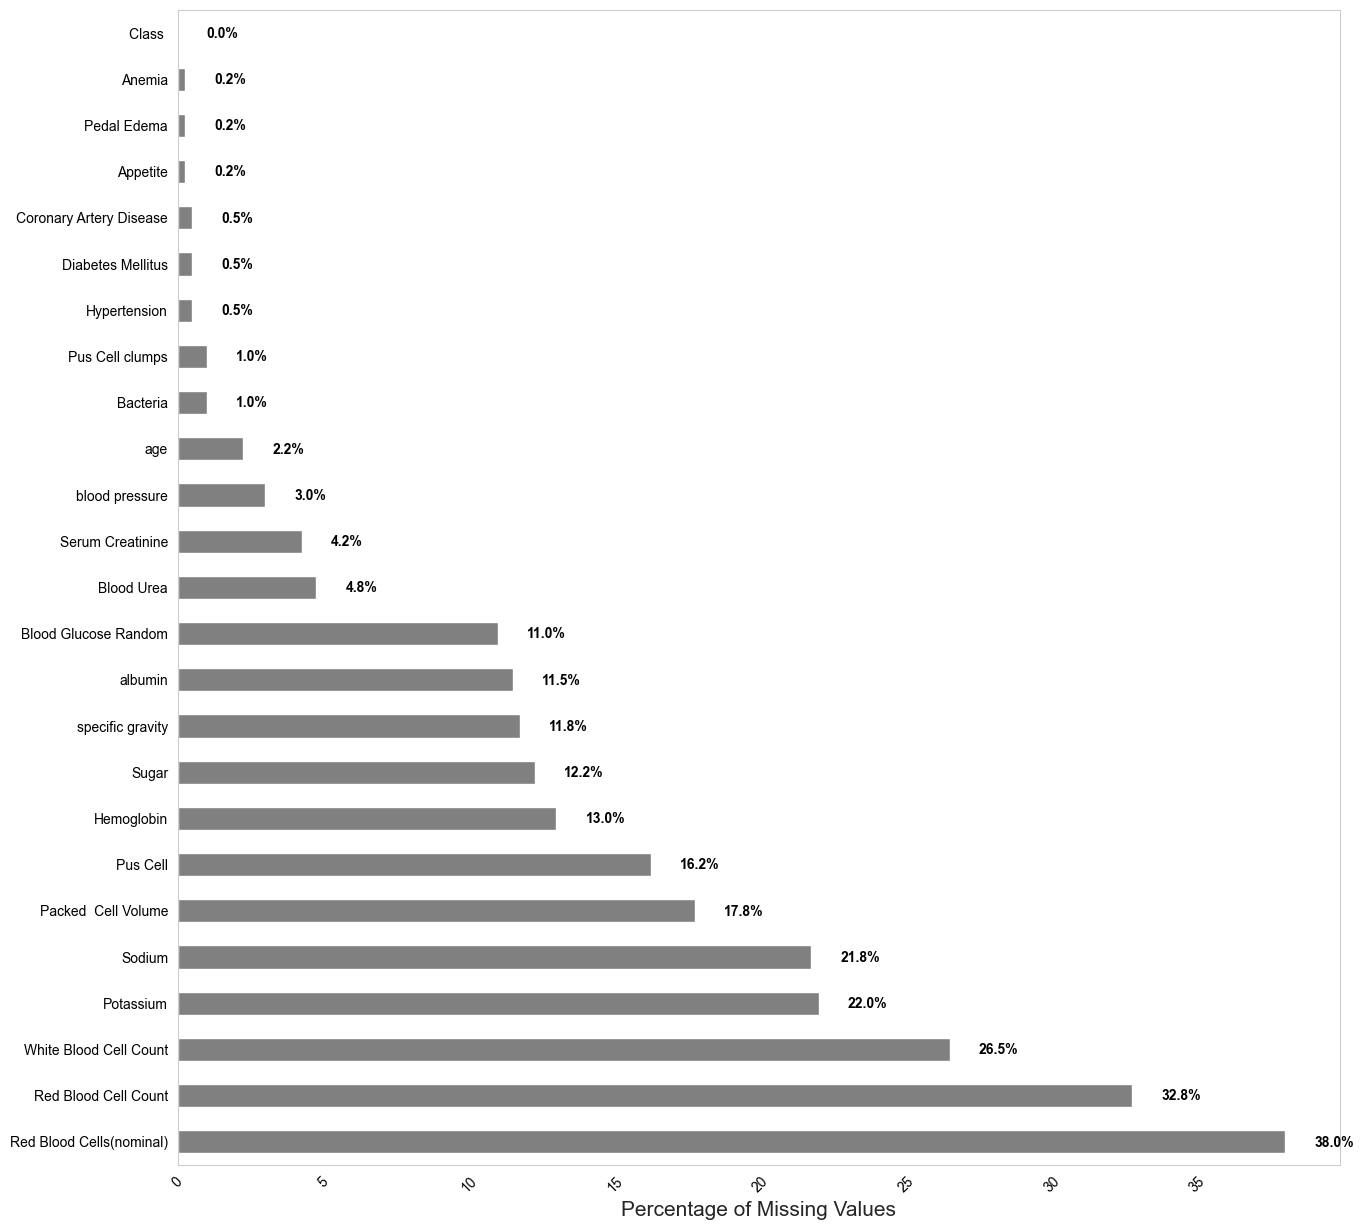

In [13]:
# Calculate percentage of missing values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Sort columns in ascending order of missing values
null_percent = missing_percent.sort_values(ascending=False)

# plot horizontal bar chart
fig, ax = plt.subplots(figsize=(15, 15))
null_percent.plot(kind='barh', color='grey')

# add data labels
for i, v in enumerate(null_percent):
    ax.text(v + 1, i - 0.1, f'{v:.1f}%', color='black', fontweight='bold')

# set x-axis label
ax.set_xlabel('Percentage of Missing Values', fontsize=12)
# set font size and background color of x and y axis tick labels
ax.tick_params(axis='x', labelsize=10, labelcolor='black', labelrotation=45)
ax.tick_params(axis='y', labelsize=10, labelcolor='black')
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
# show the plot
plt.show()

fig.savefig('missing.png')

In [14]:
#list of columns to be dropped (top 5 columns with missing values)
col_to_be_dropped=['Red Blood Cells(nominal)','Red Blood Cell Count','White Blood Cell Count','Potassium','Sodium']
try:
    df_cc = df.drop(columns=col_to_be_dropped)
except:
    pass
df_cc=df_cc.dropna()
print(f'Row:{df_cc.shape[0]} Column:{df_cc.shape[1]}')
# Save dataframe to Excel file
with pd.ExcelWriter('/Users/lawshia/Desktop/SDM Final Project/Datasets/01_datasets.xlsx') as writer:
    # write the dataframe to the specified sheet
    df_cc.to_excel(writer, sheet_name='Complete_case', index=False)

Row:245 Column:20


<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h4 id="section1" style="font-family: 'Times New Roman', Times, serif;">2. Single imputation</h4>
  </head>
</html>
    </div>

In [15]:

# for col in contd:
#     try:
#         df[col]=df[col].astype(int)
#     except:
#         df[col]=df[col].astype(float)
        

# stats = df.describe()

# # Define a function to check for outliers
# def check_for_outliers(column):
#     q1 = stats.loc['25%', column]
#     q3 = stats.loc['75%', column]
#     iqr = q3 - q1
#     upper_bound = q3 + 1.5 * iqr
#     lower_bound = q1 - 1.5 * iqr
#     outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)]
#     return outliers.index.tolist()

# # Check for outliers in each column
# outlier_columns = []
# for column in contd:
#     outliers = check_for_outliers(column)
#     if len(outliers) > 0:
#         outlier_columns.append(column)
        
# # Plot boxplots and highlight outliers
# fig, ax = plt.subplots(figsize=(12, 8))
# boxplots = df.boxplot(showfliers=True, ax=ax)
# for i, column in enumerate(outlier_columns):
#     outliers = [ydata for ydata in boxplots.get_lines()[i*6+1].get_ydata() if ydata != None] # get outlier data
#     ax.plot([i+1] * len(outliers), outliers, 'ro', alpha=0.5) # plot outliers

# # Set x-axis label with 45 degree rotation
# print(contd)
# ax.set_xticklabels(contd, rotation=90)
    
# # Show plot
# plt.show()

# # Print list of columns with outliers
# print('Columns with outliers:', outlier_columns)

# # df.head()


In [16]:
#imputing the columns with outliers with median and other columns with mean
df_si = df.copy(deep=True)
for column_name in contd:
    # Fill missing values with the median
    df_si[column_name].fillna(df_si[column_name].median(), inplace=True)
    
for column_name in cat:
    # Fill missing values with the median
    df_si[column_name].fillna(df_si[column_name].mode()[0], inplace=True)
    
with pd.ExcelWriter('/Users/lawshia/Desktop/SDM Final Project/Datasets/01_datasets.xlsx',engine='openpyxl', mode='a') as writer:
    # write the dataframe to the specified sheet
    df_si.to_excel(writer, sheet_name='Single_imputation', index=False)


<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h4 id="section1" style="font-family: 'Times New Roman', Times, serif;">3. Hybrid imputation</h4>
  </head>
</html>
    </div>

<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h5 id="section1" style="font-family: 'Times New Roman', Times, serif;">3.1 Removing redundant column</h5>
  </head>
</html>
    </div>

In [17]:
import warnings

# suppress warning messages
warnings.filterwarnings('ignore')

#continous column to be imputed
condt_new = ['age','Blood Glucose Random', 'Packed  Cell Volume','Blood Urea','Serum Creatinine']

cat_new=['Anemia', 'Appetite', 'Bacteria', 'Class ', 'Coronary Artery Disease', 'Diabetes Mellitus', 'Hypertension', 'Pedal Edema', 'Pus Cell', 'Pus Cell clumps', 'Sugar', 'specific gravity']

for col in cat_new:
    df[col]=df[col].astype(str)

df['Pus Cell'].replace('nan', np.nan)

df['num_missing'] = df.isnull().sum(axis=1)
df_filtered_row =df.copy(deep=True)
#remove RBC nominal and haemoglobin
df_filtered_row=df_filtered_row.drop('Red Blood Cells(nominal)',axis=1)
df_filtered_row=df_filtered_row.drop('Hemoglobin',axis=1)



<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h5 id="section1" style="font-family: 'Times New Roman', Times, serif;">3.2 Removing patients with more than 6 missing values</h5>
  </head>
</html>
    </div>

In [18]:

#removing patients with 5 or more missig value
df_filtered_row  = df_filtered_row[df['num_missing'] < 6] 


#imputing with observed data
for column_name in condt_new:
    # Fill missing values with the median
    df_filtered_row[column_name].fillna(df_filtered_row[column_name].median(), inplace=True)
    
for column_name in cat_new:
    # Fill missing values with the median
    df_filtered_row[column_name].fillna(df_filtered_row[column_name].mode()[0], inplace=True)
    df_filtered_row.loc[df[column_name] == 'nan', column_name] = df_filtered_row[column_name].mode()[0]
 
# fill null value rows that meet a condition
df_filtered_row.loc[(df_filtered_row['age'] >= 60) & (df_filtered_row['White Blood Cell Count'].isnull()), 'White Blood Cell Count'] = df_filtered_row[df_filtered_row['age'] >= 60]['White Blood Cell Count'].median()
    
df_filtered_row.loc[(df_filtered_row['age'] <60) & (df_filtered_row['White Blood Cell Count'].isnull()), 'White Blood Cell Count'] = df_filtered_row[df_filtered_row['age'] < 60]['White Blood Cell Count'].median()
     
 
df_filtered_row


,age,blood pressure,specific gravity,albumin,Sugar,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,Blood Urea,...,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class,num_missing
0,48.0,80.0,1.02,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,...,7800.0,5.2,yes,yes,no,good,no,no,ckd,3
1,7.0,50.0,1.02,4.0,0.0,normal,notpresent,notpresent,121.0,18.0,...,6000.0,NaN,no,no,no,good,no,no,ckd,5
2,62.0,80.0,1.01,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,...,7500.0,NaN,no,yes,no,poor,no,yes,ckd,3
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,...,6700.0,3.9,yes,no,no,poor,yes,yes,ckd,0
4,51.0,80.0,1.01,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,...,7300.0,4.6,no,no,no,good,no,no,ckd,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,notpresent,notpresent,140.0,49.0,...,6700.0,4.9,no,no,no,good,no,no,notckd,0
396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,31.0,...,7800.0,6.2,no,no,no,good,no,no,notckd,0
397,12.0,80.0,1.02,0.0,0.0,normal,notpresent,notpresent,100.0,26.0,...,6600.0,5.4,no,no,no,good,no,no,notckd,0
398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,50.0,...,7200.0,5.9,no,no,no,good,no,no,notckd,0


<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h5 id="section1" style="font-family: 'Times New Roman', Times, serif;">3.2 Regression for Sodium</h5>
  </head>
</html>
    </div>

In [19]:
# compute the correlation matrix
corr_matrix = df_filtered_row[['Sodium','Potassium','age','Blood Glucose Random', 'Packed  Cell Volume','Blood Urea','Serum Creatinine','White Blood Cell Count']].corr()
corr_matrix[['Sodium']]


,Sodium
Sodium,1.000000
Potassium,0.098377
age,-0.105917
Blood Glucose Random,-0.162378
Packed Cell Volume,0.364012
Blood Urea,-0.321750
Serum Creatinine,-0.691138
White Blood Cell Count,0.002918


In [20]:
import pandas as pd
from scipy.stats import f_oneway

df_new=df_filtered_row.dropna()

col1='Sodium'
for col2 in cat_new:
    # perform ANOVA test between 'categorical_var' and 'continuous_var'
    grouped_data = df_new.groupby(col2)[col1].apply(list)
    f_statistic, p_value = f_oneway(*grouped_data)

    # print the F-statistic and p-value
    print(f'\033[1mP values: {col1} vs {col2}\033[0m')
    print("F-statistic:", round(f_statistic,4))
    print("P-value:", round(p_value,4))

P values: Sodium vs Anemia
F-statistic: 56.6469
P-value: 0.0
P values: Sodium vs Appetite
F-statistic: 49.8764
P-value: 0.0
P values: Sodium vs Bacteria
F-statistic: 10.2085
P-value: 0.0016
P values: Sodium vs Class 
F-statistic: 100.442
P-value: 0.0
P values: Sodium vs Coronary Artery Disease
F-statistic: 11.5803
P-value: 0.0008
P values: Sodium vs Diabetes Mellitus
F-statistic: 46.7268
P-value: 0.0
P values: Sodium vs Hypertension
F-statistic: 72.5434
P-value: 0.0
P values: Sodium vs Pedal Edema
F-statistic: 42.869
P-value: 0.0
P values: Sodium vs Pus Cell
F-statistic: 54.9
P-value: 0.0
P values: Sodium vs Pus Cell clumps
F-statistic: 32.2059
P-value: 0.0
P values: Sodium vs Sugar
F-statistic: 3.0601
P-value: 0.0109
P values: Sodium vs specific gravity
F-statistic: 19.0517
P-value: 0.0


In [21]:


#linear regression code:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#age

cat_cols=['Hypertension','Anemia','Pus Cell','Class ']

#df_new: 

# separate the predictor variables (X) and the target variable (y)
X_data = df_new[['Hypertension','Anemia','Pus Cell','Class ','Serum Creatinine']]  # replace with the names of your predictor columns
Y_data = df_new['Sodium']  # replace with the name of your target column

# convert categorical features to dummy variables
X_data = pd.get_dummies(X_data, columns=cat_cols)


# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data, test_size=0.2, random_state=0)

# train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predict using the trained model
y_pred = regressor.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate root mean squared error
rmse = np.sqrt(mse)

# calculate R-squared score
r2 = r2_score(y_test, y_pred)

print('Mean squared error: {:.2f}'.format(round(mse,2)))
print('Root mean squared error: {:.2f}'.format(rmse))
print('R-squared score: {:.2f}'.format(r2))

X_to_bre_predicted = df_filtered_row[df_filtered_row['Sodium'].isna()][['Hypertension','Anemia','Pus Cell','Class ','Serum Creatinine']]

X_to_bre_predicted = pd.get_dummies(X_to_bre_predicted, columns=cat_cols)


Y_final_predicted=regressor.predict(X_to_bre_predicted)



Mean squared error: 26.99
Root mean squared error: 5.20
R-squared score: 0.16


In [22]:
df_filtered_row.loc[df_filtered_row['Sodium'].isna(), 'Sodium'] = Y_final_predicted
df_filtered_row

,age,blood pressure,specific gravity,albumin,Sugar,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,Blood Urea,...,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class,num_missing
0,48.0,80.0,1.02,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,...,7800.0,5.2,yes,yes,no,good,no,no,ckd,3
1,7.0,50.0,1.02,4.0,0.0,normal,notpresent,notpresent,121.0,18.0,...,6000.0,NaN,no,no,no,good,no,no,ckd,5
2,62.0,80.0,1.01,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,...,7500.0,NaN,no,yes,no,poor,no,yes,ckd,3
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,...,6700.0,3.9,yes,no,no,poor,yes,yes,ckd,0
4,51.0,80.0,1.01,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,...,7300.0,4.6,no,no,no,good,no,no,ckd,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,notpresent,notpresent,140.0,49.0,...,6700.0,4.9,no,no,no,good,no,no,notckd,0
396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,31.0,...,7800.0,6.2,no,no,no,good,no,no,notckd,0
397,12.0,80.0,1.02,0.0,0.0,normal,notpresent,notpresent,100.0,26.0,...,6600.0,5.4,no,no,no,good,no,no,notckd,0
398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,50.0,...,7200.0,5.9,no,no,no,good,no,no,notckd,0


<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h5 id="section1" style="font-family: 'Times New Roman', Times, serif;">3.2 Regression for potassium</h5>
  </head>
</html>
    </div>

In [23]:
# compute the correlation matrix
corr_matrix = df_filtered_row[['Sodium','Potassium','age','Blood Glucose Random', 'Packed  Cell Volume','Blood Urea','Serum Creatinine','White Blood Cell Count']].corr()
corr_matrix[['Potassium']]



,Potassium
Sodium,0.098377
Potassium,1.000000
age,0.054248
Blood Glucose Random,0.066787
Packed Cell Volume,-0.125678
Blood Urea,0.368016
Serum Creatinine,0.330764
White Blood Cell Count,-0.067561


In [24]:
import pandas as pd
from scipy.stats import f_oneway

df_new=df_filtered_row.dropna()

col1='Potassium'
for col2 in cat_new:
    # perform ANOVA test between 'categorical_var' and 'continuous_var'
    grouped_data = df_new.groupby(col2)[col1].apply(list)
    f_statistic, p_value = f_oneway(*grouped_data)

    # print the F-statistic and p-value
    print(f'\033[1mP values: {col1} vs {col2}\033[0m')
    print("F-statistic:", round(f_statistic,4))
    print("P-value:", round(p_value,4))

P values: Potassium vs Anemia
F-statistic: 10.7764
P-value: 0.0012
P values: Potassium vs Appetite
F-statistic: 0.0001
P-value: 0.9924
P values: Potassium vs Bacteria
F-statistic: 0.0309
P-value: 0.8606
P values: Potassium vs Class 
F-statistic: 1.7013
P-value: 0.1935
P values: Potassium vs Coronary Artery Disease
F-statistic: 0.1193
P-value: 0.7302
P values: Potassium vs Diabetes Mellitus
F-statistic: 3.7122
P-value: 0.0553
P values: Potassium vs Hypertension
F-statistic: 3.4012
P-value: 0.0665
P values: Potassium vs Pedal Edema
F-statistic: 0.0922
P-value: 0.7617
P values: Potassium vs Pus Cell
F-statistic: 5.4625
P-value: 0.0203
P values: Potassium vs Pus Cell clumps
F-statistic: 0.0148
P-value: 0.9032
P values: Potassium vs Sugar
F-statistic: 6.5222
P-value: 0.0
P values: Potassium vs specific gravity
F-statistic: 1.8996
P-value: 0.1116


In [25]:


#linear regression code:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#age

cat_cols=['Sugar','Anemia','Pus Cell']

#df_new: 

# separate the predictor variables (X) and the target variable (y)
X_data = df_new[['Blood Urea','Anemia','Pus Cell','Sugar','Serum Creatinine']]  # replace with the names of your predictor columns
Y_data = df_new['Potassium']  # replace with the name of your target column

# convert categorical features to dummy variables
X_data = pd.get_dummies(X_data, columns=cat_cols)


# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data, test_size=0.2, random_state=0)

# train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predict using the trained model
y_pred = regressor.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate root mean squared error
rmse = np.sqrt(mse)

# calculate R-squared score
r2 = r2_score(y_test, y_pred)

print('Mean squared error: {:.2f}'.format(round(mse,2)))
print('Root mean squared error: {:.2f}'.format(rmse))
print('R-squared score: {:.2f}'.format(r2))

X_to_bre_predicted = df_filtered_row[df_filtered_row['Potassium'].isna()][['Blood Urea','Anemia','Pus Cell','Sugar','Serum Creatinine']]

X_to_bre_predicted = pd.get_dummies(X_to_bre_predicted, columns=cat_cols)


Y_final_predicted=regressor.predict(X_to_bre_predicted)

df_filtered_row.loc[df_filtered_row['Potassium'].isna(), 'Potassium']=Y_final_predicted



Mean squared error: 3.73
Root mean squared error: 1.93
R-squared score: -4.74


<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h5 id="section1" style="font-family: 'Times New Roman', Times, serif;">3.2 Regression for RBC</h5>
  </head>
</html>
    </div>

In [26]:
# compute the correlation matrix
corr_matrix = df_filtered_row[['Sodium','Red Blood Cell Count','age','Blood Glucose Random', 'Packed  Cell Volume','Blood Urea','Serum Creatinine']].corr()
corr_matrix



,Sodium,Red Blood Cell Count,age,Blood Glucose Random,Packed Cell Volume,Blood Urea,Serum Creatinine
Sodium,1.000000,0.348200,-0.111957,-0.170082,0.367212,-0.319386,-0.683163
Red Blood Cell Count,0.348200,1.000000,-0.269119,-0.266603,0.781457,-0.574967,-0.400695
age,-0.111957,-0.269119,1.000000,0.253265,-0.233460,0.200616,0.128168
Blood Glucose Random,-0.170082,-0.266603,0.253265,1.000000,-0.272095,0.141438,0.075324
Packed Cell Volume,0.367212,0.781457,-0.233460,-0.272095,1.000000,-0.552148,-0.380570
Blood Urea,-0.319386,-0.574967,0.200616,0.141438,-0.552148,1.000000,0.643751
Serum Creatinine,-0.683163,-0.400695,0.128168,0.075324,-0.380570,0.643751,1.000000


In [27]:
import pandas as pd
from scipy.stats import f_oneway

df_new=df_filtered_row.dropna()

col1='Red Blood Cell Count'
for col2 in cat_new:
    # perform ANOVA test between 'categorical_var' and 'continuous_var'
    grouped_data = df_new.groupby(col2)[col1].apply(list)
    f_statistic, p_value = f_oneway(*grouped_data)

    # print the F-statistic and p-value
    print(f'\033[1mP values: {col1} vs {col2}\033[0m')
    print("F-statistic:", round(f_statistic,4))
    print("P-value:", round(p_value,4))

P values: Red Blood Cell Count vs Anemia
F-statistic: 80.6565
P-value: 0.0
P values: Red Blood Cell Count vs Appetite
F-statistic: 83.5756
P-value: 0.0
P values: Red Blood Cell Count vs Bacteria
F-statistic: 18.039
P-value: 0.0
P values: Red Blood Cell Count vs Class 
F-statistic: 233.2206
P-value: 0.0
P values: Red Blood Cell Count vs Coronary Artery Disease
F-statistic: 32.7824
P-value: 0.0
P values: Red Blood Cell Count vs Diabetes Mellitus
F-statistic: 95.2086
P-value: 0.0
P values: Red Blood Cell Count vs Hypertension
F-statistic: 162.6691
P-value: 0.0
P values: Red Blood Cell Count vs Pedal Edema
F-statistic: 76.9725
P-value: 0.0
P values: Red Blood Cell Count vs Pus Cell
F-statistic: 100.8455
P-value: 0.0
P values: Red Blood Cell Count vs Pus Cell clumps
F-statistic: 44.8692
P-value: 0.0
P values: Red Blood Cell Count vs Sugar
F-statistic: 6.1401
P-value: 0.0
P values: Red Blood Cell Count vs specific gravity
F-statistic: 39.2798
P-value: 0.0


In [28]:


#linear regression code:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#age

cat_cols=['Hypertension','Class ','Pus Cell']

#df_new: 

# separate the predictor variables (X) and the target variable (y)
X_data = df_new[['Blood Urea','Hypertension','Class ','Pus Cell','Packed  Cell Volume']]  # replace with the names of your predictor columns
Y_data = df_new['Red Blood Cell Count']  # replace with the name of your target column

# convert categorical features to dummy variables
X_data = pd.get_dummies(X_data, columns=cat_cols)


# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data, test_size=0.2, random_state=0)

# train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predict using the trained model
y_pred = regressor.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate root mean squared error
rmse = np.sqrt(mse)

# calculate R-squared score
r2 = r2_score(y_test, y_pred)

print('Mean squared error: {:.2f}'.format(round(mse,2)))
print('Root mean squared error: {:.2f}'.format(rmse))
print('R-squared score: {:.2f}'.format(r2))

X_to_bre_predicted = df_filtered_row[df_filtered_row['Red Blood Cell Count'].isna()][['Blood Urea','Hypertension','Class ','Pus Cell','Packed  Cell Volume']]

X_to_bre_predicted = pd.get_dummies(X_to_bre_predicted, columns=cat_cols)


Y_final_predicted=regressor.predict(X_to_bre_predicted)

df_filtered_row.loc[df_filtered_row['Red Blood Cell Count'].isna(), 'Red Blood Cell Count']=Y_final_predicted



Mean squared error: 0.26
Root mean squared error: 0.51
R-squared score: 0.74


<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h5 id="section1" style="font-family: 'Times New Roman', Times, serif;">3.2 Regression for Blood Pressure</h5>
  </head>
</html>
    </div>

In [29]:
# compute the correlation matrix
corr_matrix = df_filtered_row[['blood pressure','Sodium','age','Blood Glucose Random', 'Packed  Cell Volume','Blood Urea','Serum Creatinine']].corr()
corr_matrix


,blood pressure,Sodium,age,Blood Glucose Random,Packed Cell Volume,Blood Urea,Serum Creatinine
blood pressure,1.000000,-0.122498,0.164639,0.164220,-0.318786,0.205204,0.197332
Sodium,-0.122498,1.000000,-0.111957,-0.170082,0.367212,-0.319386,-0.683163
age,0.164639,-0.111957,1.000000,0.253265,-0.233460,0.200616,0.128168
Blood Glucose Random,0.164220,-0.170082,0.253265,1.000000,-0.272095,0.141438,0.075324
Packed Cell Volume,-0.318786,0.367212,-0.233460,-0.272095,1.000000,-0.552148,-0.380570
Blood Urea,0.205204,-0.319386,0.200616,0.141438,-0.552148,1.000000,0.643751
Serum Creatinine,0.197332,-0.683163,0.128168,0.075324,-0.380570,0.643751,1.000000


In [30]:
import pandas as pd
from scipy.stats import f_oneway

df_new=df_filtered_row.dropna()

col1='blood pressure'
for col2 in cat_new:
    # perform ANOVA test between 'categorical_var' and 'continuous_var'
    grouped_data = df_new.groupby(col2)[col1].apply(list)
    f_statistic, p_value = f_oneway(*grouped_data)

    # print the F-statistic and p-value
    print(f'\033[1mP values: {col1} vs {col2}\033[0m')
    print("F-statistic:", round(f_statistic,4))
    print("P-value:", round(p_value,4))

P values: blood pressure vs Anemia
F-statistic: 14.874
P-value: 0.0001
P values: blood pressure vs Appetite
F-statistic: 15.8336
P-value: 0.0001
P values: blood pressure vs Bacteria
F-statistic: 6.2689
P-value: 0.0128
P values: blood pressure vs Class 
F-statistic: 31.3615
P-value: 0.0
P values: blood pressure vs Coronary Artery Disease
F-statistic: 2.7823
P-value: 0.0963
P values: blood pressure vs Diabetes Mellitus
F-statistic: 17.8876
P-value: 0.0
P values: blood pressure vs Hypertension
F-statistic: 29.7699
P-value: 0.0
P values: blood pressure vs Pedal Edema
F-statistic: 3.4446
P-value: 0.0644
P values: blood pressure vs Pus Cell
F-statistic: 14.6611
P-value: 0.0002
P values: blood pressure vs Pus Cell clumps
F-statistic: 2.1998
P-value: 0.139
P values: blood pressure vs Sugar
F-statistic: 4.6706
P-value: 0.0004
P values: blood pressure vs specific gravity
F-statistic: 5.1557
P-value: 0.0005


In [31]:


#linear regression code:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#age

cat_cols=['Hypertension','Class ','Diabetes Mellitus','Anemia']

#df_new: 

# separate the predictor variables (X) and the target variable (y)
X_data = df_new[['Hypertension','Class ','Diabetes Mellitus','Anemia','Packed  Cell Volume']]  # replace with the names of your predictor columns
Y_data = df_new['blood pressure']  # replace with the name of your target column

# convert categorical features to dummy variables
X_data = pd.get_dummies(X_data, columns=cat_cols)


# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data, test_size=0.2, random_state=0)

# train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predict using the trained model
y_pred = regressor.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate root mean squared error
rmse = np.sqrt(mse)

# calculate R-squared score
r2 = r2_score(y_test, y_pred)

print('Mean squared error: {:.2f}'.format(round(mse,2)))
print('Root mean squared error: {:.2f}'.format(rmse))
print('R-squared score: {:.2f}'.format(r2))

X_to_bre_predicted = df_filtered_row[df_filtered_row['blood pressure'].isna()][['Hypertension','Class ','Diabetes Mellitus','Anemia','Packed  Cell Volume']]

X_to_bre_predicted = pd.get_dummies(X_to_bre_predicted, columns=cat_cols)


Y_final_predicted=regressor.predict(X_to_bre_predicted)

df_filtered_row.loc[df_filtered_row['blood pressure'].isna(), 'blood pressure']=Y_final_predicted

df_filtered_row


Mean squared error: 331.33
Root mean squared error: 18.20
R-squared score: 0.07


,age,blood pressure,specific gravity,albumin,Sugar,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,Blood Urea,...,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class,num_missing
0,48.0,80.0,1.02,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,...,7800.0,5.200000,yes,yes,no,good,no,no,ckd,3
1,7.0,50.0,1.02,4.0,0.0,normal,notpresent,notpresent,121.0,18.0,...,6000.0,4.651121,no,no,no,good,no,no,ckd,5
2,62.0,80.0,1.01,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,...,7500.0,4.205719,no,yes,no,poor,no,yes,ckd,3
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,...,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd,0
4,51.0,80.0,1.01,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,...,7300.0,4.600000,no,no,no,good,no,no,ckd,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,notpresent,notpresent,140.0,49.0,...,6700.0,4.900000,no,no,no,good,no,no,notckd,0
396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,31.0,...,7800.0,6.200000,no,no,no,good,no,no,notckd,0
397,12.0,80.0,1.02,0.0,0.0,normal,notpresent,notpresent,100.0,26.0,...,6600.0,5.400000,no,no,no,good,no,no,notckd,0
398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,50.0,...,7200.0,5.900000,no,no,no,good,no,no,notckd,0


<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h5 id="section1" style="font-family: 'Times New Roman', Times, serif;">3.2 Regression for Albumin</h5>
  </head>
</html>
    </div>

In [32]:
import pandas as pd
from scipy.stats import f_oneway

df_new=df_filtered_row.dropna()

col2='albumin'
for col1 in condt_new:
    # perform ANOVA test between 'categorical_var' and 'continuous_var'
    grouped_data = df_new.groupby(col2)[col1].apply(list)
    f_statistic, p_value = f_oneway(*grouped_data)

    # print the F-statistic and p-value
    print(f'\033[1mP values: {col2} vs {col1}\033[0m')
    print("F-statistic:", round(f_statistic,4))
    print("P-value:", round(p_value,4))
    


P values: albumin vs age
F-statistic: 3.9046
P-value: 0.0019
P values: albumin vs Blood Glucose Random
F-statistic: 11.7315
P-value: 0.0
P values: albumin vs Packed  Cell Volume
F-statistic: 44.7656
P-value: 0.0
P values: albumin vs Blood Urea
F-statistic: 27.5016
P-value: 0.0
P values: albumin vs Serum Creatinine
F-statistic: 16.8939
P-value: 0.0


In [33]:
import pandas as pd
from scipy.stats import chi2_contingency

col2 = 'albumin'
for col in cat_new:
    # create a contingency table
    cont_table = pd.crosstab(df[col], df[col2])

    # perform chi-square test
    chi2_stat, p_val, dof, ex = chi2_contingency(cont_table)
    print(f'\033[1m{col} vs {col2}\033[0m')
    print(f"Chi-square statistic: {chi2_stat:.2f}")
    print(f"P-value: {p_val:.2f}")

Anemia vs albumin
Chi-square statistic: 47.58
P-value: 0.00
Appetite vs albumin
Chi-square statistic: 55.86
P-value: 0.00
Bacteria vs albumin
Chi-square statistic: 67.30
P-value: 0.00
Class  vs albumin
Chi-square statistic: 191.29
P-value: 0.00
Coronary Artery Disease vs albumin
Chi-square statistic: 45.52
P-value: 0.00
Diabetes Mellitus vs albumin
Chi-square statistic: 80.34
P-value: 0.00
Hypertension vs albumin
Chi-square statistic: 112.37
P-value: 0.00
Pedal Edema vs albumin
Chi-square statistic: 85.13
P-value: 0.00
Pus Cell vs albumin
Chi-square statistic: 130.49
P-value: 0.00
Pus Cell clumps vs albumin
Chi-square statistic: 80.18
P-value: 0.00
Sugar vs albumin
Chi-square statistic: 79.88
P-value: 0.00
specific gravity vs albumin
Chi-square statistic: 137.34
P-value: 0.00


In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cat_cols=['Hypertension','Class ','Pus Cell','specific gravity']
# separate the predictor variables (X) and the target variable (y)
X_data = df_new[['Hypertension','Class ','Pus Cell','Packed  Cell Volume','specific gravity']]  # replace with the names of your predictor columns
Y_data = df_new['albumin']  # replace with the name of your target column


# Convert categorical features to dummy variables
X_data = pd.get_dummies(X_data, columns=['Hypertension','Class ','Pus Cell','specific gravity'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)

# Scale the continuous features
scaler = StandardScaler()
X_train[['Packed  Cell Volume']] = scaler.fit_transform(X_train[['Packed  Cell Volume']])
X_test[['Packed  Cell Volume']] = scaler.transform(X_test[['Packed  Cell Volume']])

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


X_to_bre_predicted = df_filtered_row[df_filtered_row['albumin'].isna()][['Hypertension','Class ','Pus Cell','Packed  Cell Volume','specific gravity']]

X_to_bre_predicted = pd.get_dummies(X_to_bre_predicted, columns=cat_cols)
scaler = StandardScaler()
X_to_bre_predicted[['Packed  Cell Volume']] = scaler.fit_transform(X_to_bre_predicted[['Packed  Cell Volume']])
X_to_bre_predicted[['Packed  Cell Volume']] = scaler.transform(X_to_bre_predicted[['Packed  Cell Volume']])
X_to_bre_predicted[['specific gravity_1.005']] = False
X_to_bre_predicted[['specific gravity_1.015']] = False
X_to_bre_predicted[['specific gravity_1.025']] = False
X_to_bre_predicted[['Pus Cell_abnormal']]=False

Y_to_bre_predicted = model.predict(X_to_bre_predicted)

# # Evaluate the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


df_filtered_row.loc[df_filtered_row['albumin'].isna(), 'albumin']=Y_to_bre_predicted
df_filtered_row






              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84        53
         1.0       0.17      0.18      0.17        11
         2.0       0.31      0.40      0.35        10
         3.0       0.35      0.50      0.41        14
         4.0       1.00      0.10      0.18        10

    accuracy                           0.59        98
   macro avg       0.53      0.40      0.39        98
weighted avg       0.66      0.59      0.59        98



,age,blood pressure,specific gravity,albumin,Sugar,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,Blood Urea,...,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class,num_missing
0,48.0,80.0,1.02,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,...,7800.0,5.200000,yes,yes,no,good,no,no,ckd,3
1,7.0,50.0,1.02,4.0,0.0,normal,notpresent,notpresent,121.0,18.0,...,6000.0,4.651121,no,no,no,good,no,no,ckd,5
2,62.0,80.0,1.01,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,...,7500.0,4.205719,no,yes,no,poor,no,yes,ckd,3
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,...,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd,0
4,51.0,80.0,1.01,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,...,7300.0,4.600000,no,no,no,good,no,no,ckd,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,notpresent,notpresent,140.0,49.0,...,6700.0,4.900000,no,no,no,good,no,no,notckd,0
396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,31.0,...,7800.0,6.200000,no,no,no,good,no,no,notckd,0
397,12.0,80.0,1.02,0.0,0.0,normal,notpresent,notpresent,100.0,26.0,...,6600.0,5.400000,no,no,no,good,no,no,notckd,0
398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,50.0,...,7200.0,5.900000,no,no,no,good,no,no,notckd,0


In [35]:
df_filtered_row.isna().sum()

age                        0
blood pressure             0
specific gravity           0
albumin                    0
Sugar                      0
Pus Cell                   0
Pus Cell clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Packed  Cell Volume        0
White Blood Cell Count     0
Red Blood Cell Count       0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
Class                      0
num_missing                0
dtype: int64

In [36]:
with pd.ExcelWriter('/Users/lawshia/Desktop/SDM Final Project/Datasets/01_datasets.xlsx',engine='openpyxl', mode='a') as writer:
    # write the dataframe to the specified sheet
    df_filtered_row.to_excel(writer, sheet_name='Hybrid_imputation', index=False)